BEST CODE WITH ALL FEATURES

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 10 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_3y12ka
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.330 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
14:44:20.312: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:44:20.313: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 59.2192
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3506.907753141168
RMSE: 59.219150223058485
MAE: 40.10168803734146
RMSLE: 0.1506554565755855
Mean Residual Deviance: 3506.907753141168
R^2: 0.9562923214256457
Null degrees of freedom: 643
Residual degrees of freedom: 624
Null deviance: 51761570.07439915
Residual devia

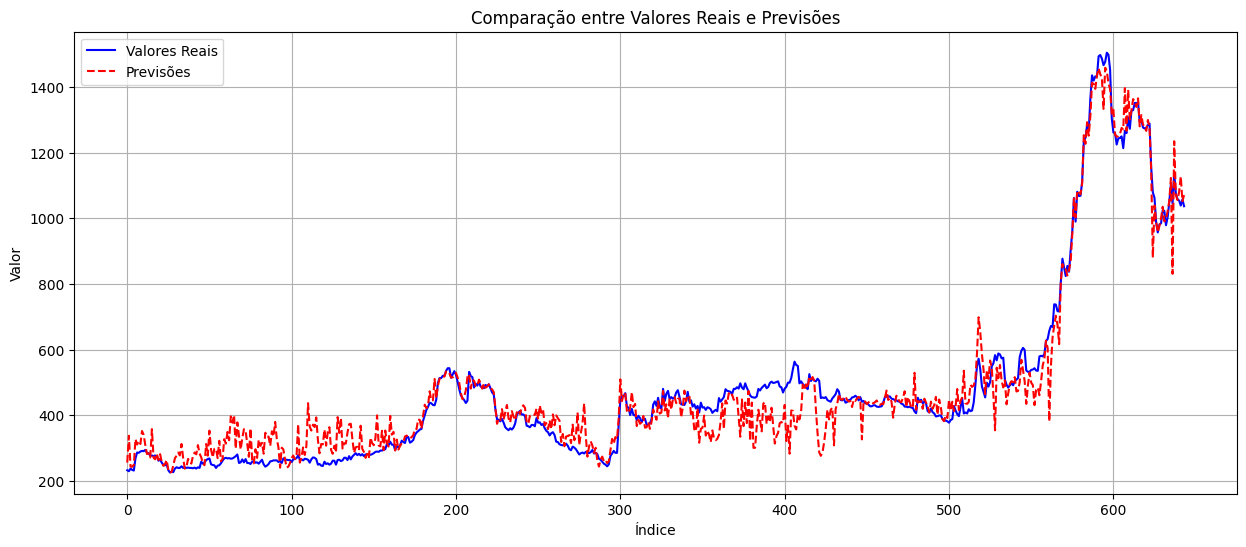

In [11]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/base3.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(real_values, label="Valores Reais", color="blue")
plt.plot(predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


Base sem URAMA

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 35 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_3y12ka
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.489 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
17:08:51.183: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
17:08:51.188: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 63.3743
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4016.301105166532
RMSE: 63.37429372518902
MAE: 41.30114725783248
RMSLE: 0.14994905845358045
Mean Residual Deviance: 4016.301105166532
R^2: 0.9475527436081951
Null degrees of freedom: 626
Residual degrees of freedom: 605
Null deviance: 48135582.648453414
Residual devi

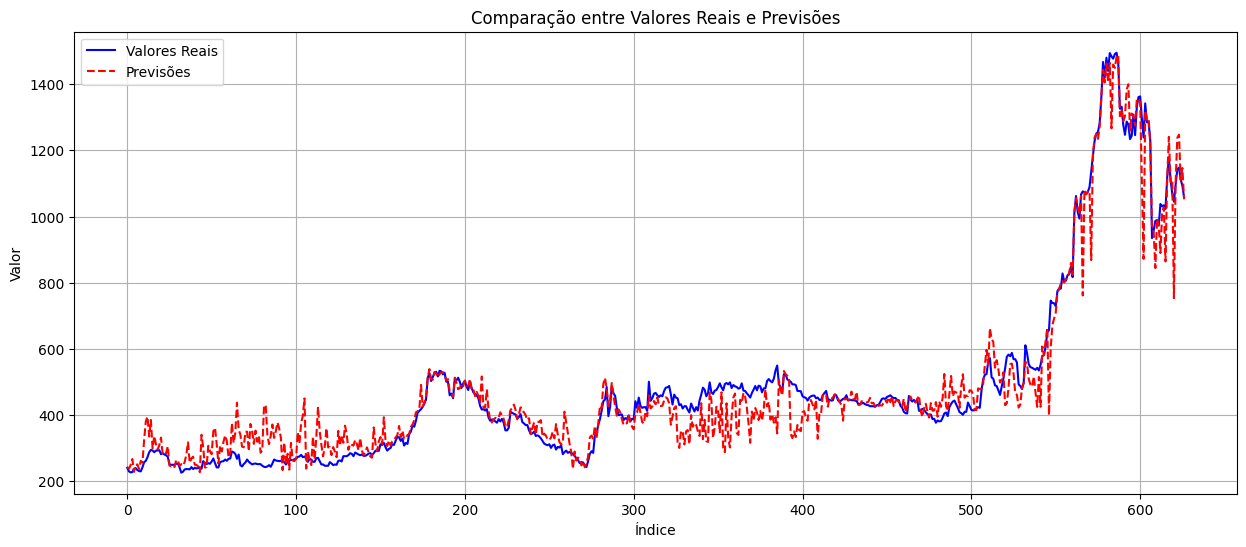

In [13]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMA.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(real_values, label="Valores Reais", color="blue")
plt.plot(predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


SEM URAMI

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 45 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_3y12ka
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.585 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
17:18:33.282: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
17:18:33.282: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 64.0555
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4103.110987545033
RMSE: 64.05553049928658
MAE: 40.44327583570365
RMSLE: 0.15046457469807795
Mean Residual Deviance: 4103.110987545033
R^2: 0.9515584959278308
Null degrees of freedom: 616
Residual degrees of freedom: 594
Null deviance: 52319083.87070677
Residual devia

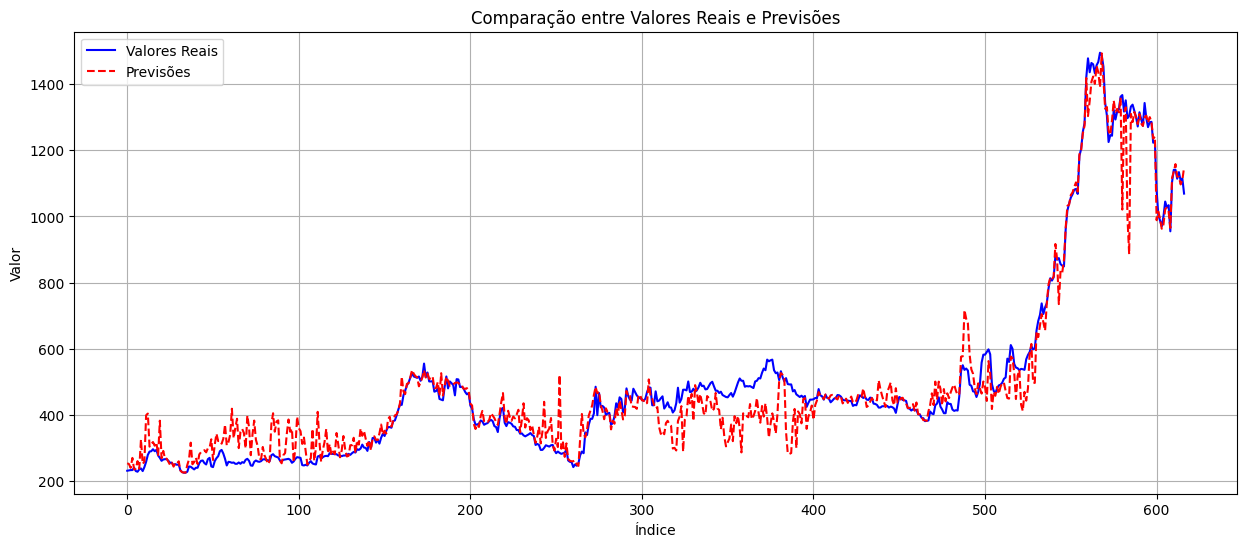

In [14]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMI.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(real_values, label="Valores Reais", color="blue")
plt.plot(predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


SEM URADI

In [ ]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URADI.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(real_values, label="Valores Reais", color="blue")
plt.plot(predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()
